# Instagram Reach Analysis

In this project, our goal is to study Instagram data, which we've gathered from this website: https://statso.io/instagram-reach-analysis-case-study/.

This data comes from the founder of Statso's Instagram account. This Instagram data was collected from a Business Instagram account and will have more insights to analyze rather than a personal instagram account.
To get a better grasp of this information, we can look at specific aspects of it:

- Impressions: This tells us how many times a post was seen (its reach).
- From Home: It shows how many views the post got from users' home feeds.
- From Hashtags: It reveals the number of views that came from using hashtags.
- From Explore: This is the count of views generated from the Explore feature.
- From Other: It accounts for views from various other sources.
- Saves: This tells us how many times a post was saved by users.
- Comments: It's the total number of comments received on a post.
- Shares: It counts how many times the post was shared.
- Likes: This represents the number of users who liked the post.
- Profile Visits: It shows how many users visited the post author's profile from that post.
- Follows: This indicates how many users followed the account due to the post.
- Caption: It's the text accompanying the post.
- Hashtags: These are the hashtags used in the post.

Main objectives are to understand how Instagram's algorithm functions and to analyze how far-reaching (in terms of impressions) each post is within the provided Instagram account.

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
# Load the data
data =pd.read_csv("Instagram data.csv", encoding = 'latin1')
print(data.head())

   Impressions  From Home  From Hashtags  From Explore  From Other  Saves  \
0         3920       2586           1028           619          56     98   
1         5394       2727           1838          1174          78    194   
2         4021       2085           1188             0         533     41   
3         4528       2700            621           932          73    172   
4         2518       1704            255           279          37     96   

   Comments  Shares  Likes  Profile Visits  Follows  \
0         9       5    162              35        2   
1         7      14    224              48       10   
2        11       1    131              62       12   
3        10       7    213              23        8   
4         5       4    123               8        0   

                                             Caption  \
0  Here are some of the most important data visua...   
1  Here are some of the best data science project...   
2  Learn how to train a machine learni

In [3]:
# Checking for null values in the data
print(" Checking Null Values")
data.isnull().sum()

 Checking Null Values


Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [4]:
# As the data has null values in every column, lets drop these null values
data = data.dropna()

In [5]:
#Looking at the insights of the columns to understand the data
print(" Data insights ")
data.info()

 Data insights 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 13.0+ KB


# Exploring Data

C:\Users\navya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


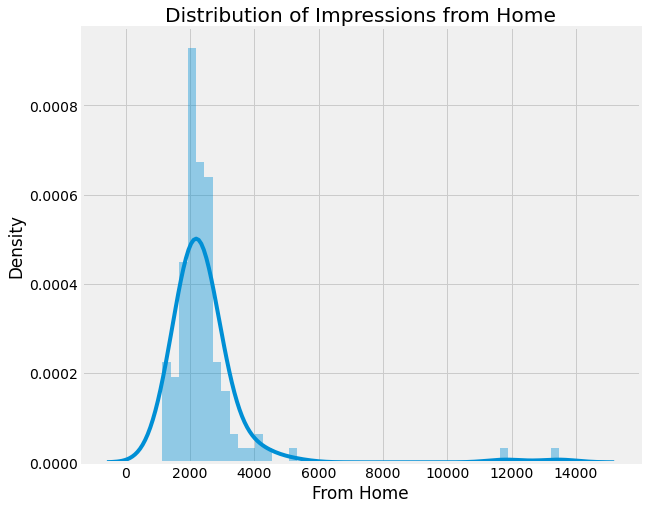

In [6]:
# Analyzing Instagram Reach
plt.figure(figsize =(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions from Home")
sns.distplot(data ['From Home'])
plt.show()

C:\Users\navya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


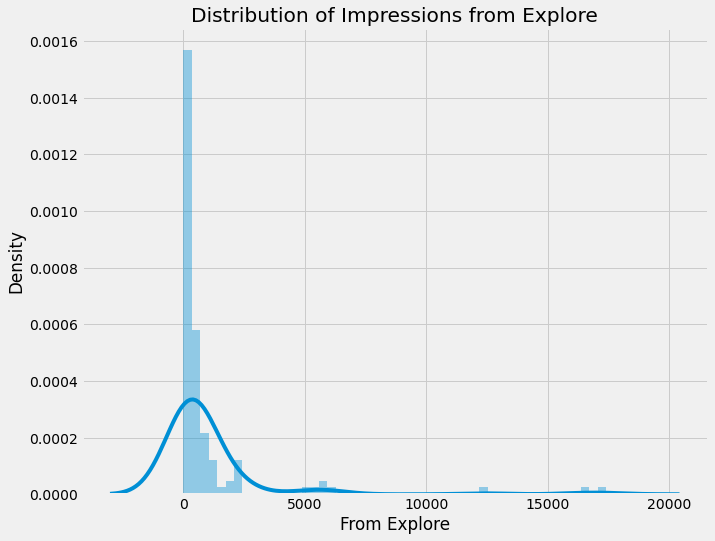

In [7]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions from Explore")
sns.distplot(data['From Explore'])
plt.show()

C:\Users\navya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


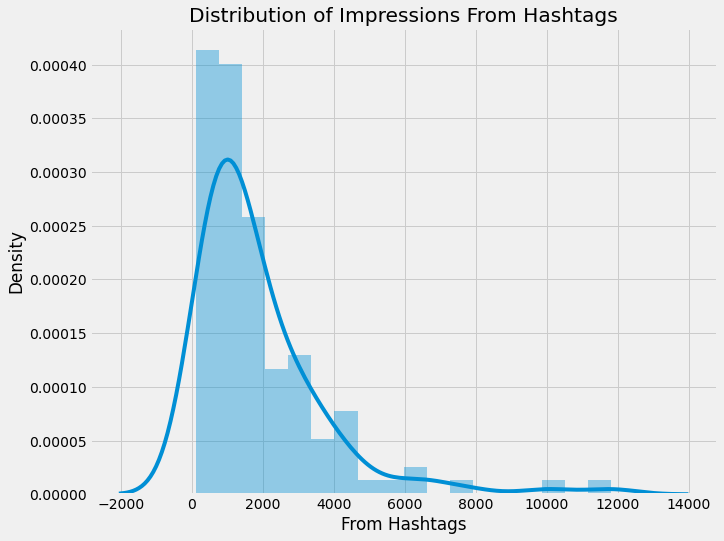

In [8]:
plt.figure(figsize =(10,8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

C:\Users\navya\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


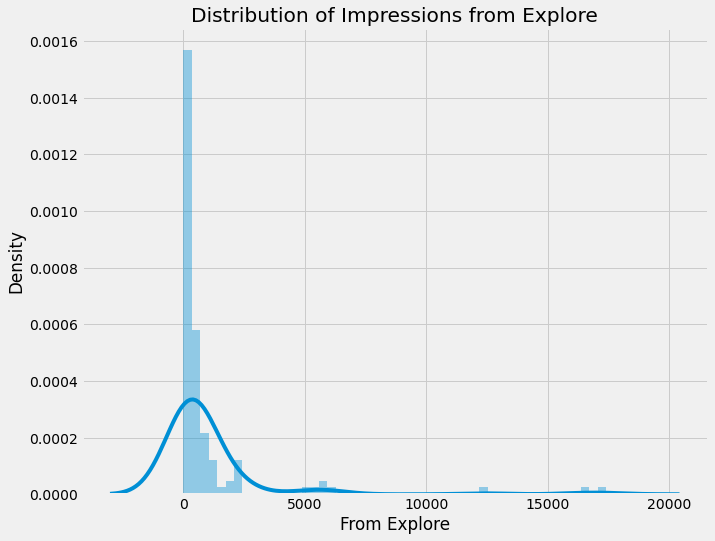

In [9]:
plt.figure(figsize = (10,8))
plt.title("Distribution of Impressions from Explore")
sns.distplot(data['From Explore'])
plt.show()

In [10]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

In [11]:
labels = ['From Home', 'From Hashtags', 'From Explore', 'Other']
values = [home, hashtags, explore, other]

In [12]:
fig = px.pie(data, values=values, names=labels, title = 'Impressions on Instagram Posts from different sources', hole = 0.5)
fig.show()

# Analyzing Content

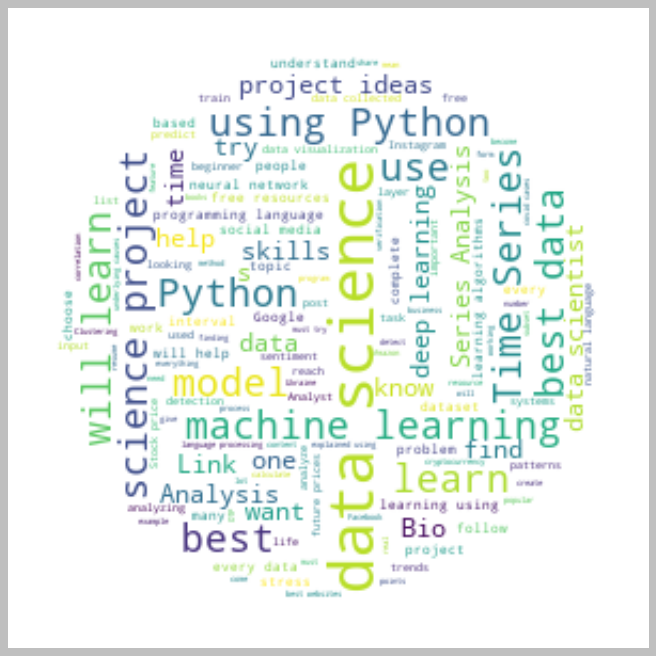

In [13]:
#Creating a wordcloud for the captions 
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)

#Circle mask
x, y =np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y -150) ** 2 >130 **2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(stopwords=stopwords, background_color="white", repeat = True, mask = mask)
wordcloud.generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation= 'bilinear')
plt.axis("off")
plt.show()

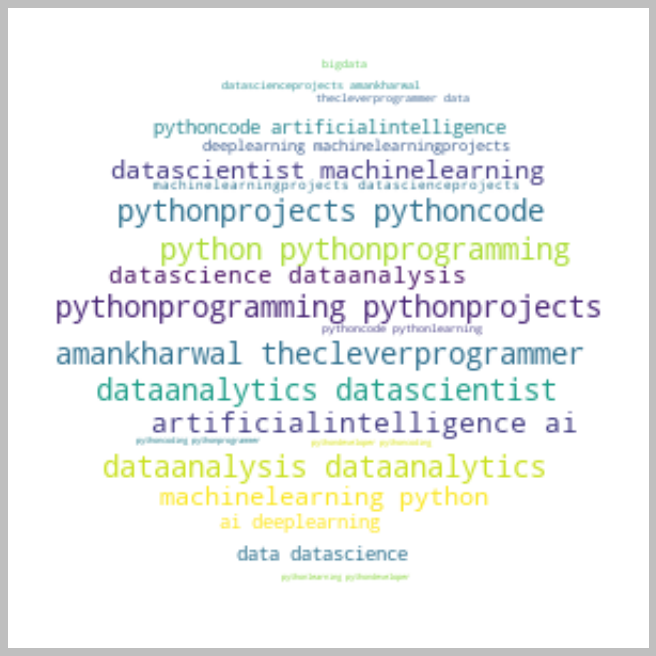

In [14]:
# Creating a wordcount for hashtags
text = "".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
#Circle mask
x, y =np.ogrid[:300, :300]
mask = (x - 150) ** 2 + (y -150) ** 2 >130 **2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(stopwords=stopwords, background_color="white", repeat = True, mask = mask)
wordcloud.generate(text)
plt.style.use('classic')
plt.figure(figsize=(12,10))
plt.imshow(wordcloud,interpolation= 'bilinear')
plt.axis("off")
plt.show()

 # Analyzing Relationships

In [15]:
figure = px.scatter(data_frame = data, x="Impressions",
                   y ="Likes", size="Likes", trendline="ols",
                   title="Relationship Between Likes and Impressions")
figure.show()

In [16]:
# Relationship between the number of shares and the number of impressions
figure = px.scatter(data_frame = data, x="Impressions",
                   y="Shares", size="Shares", trendline="ols",
                   title="Relationship Between Shares and Total Impressions")
figure.show()

In [17]:
# Relationship Between the number of Saves and number of Impressions
figure= px.scatter(data_frame=data, x="Impressions",
                  y="Saves", size="Saves",trendline="ols",
                  title="Relationship Between the Posts Saved and the Total Impressions")
figure.show()

# Correlation of all the Columns with the Impressions

In [18]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))

Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


# Analyzing Conversion Rate

Instagram Conversion rate is the number of followers you get from the numnber of profile visits from a post

In [19]:
conversion_rate = (data["Follows"].sum()/ data["Profile Visits"].sum())*100
print(conversion_rate)

41.00265604249668


In [20]:
# Checking the Relationship between the total profile and the number of folllowers gained from the profile visits.
figure = px.scatter(data_frame = data, x = "Profile Visits",
                   y = "Follows", trendline ="ols",
                   title = "Relationship Between Profile Visits and Followers Gained")
figure.show()

In [21]:
# Instagram Reach Prediction Model
x = np.array(data[['Likes', 'Saves', 'Comments', 'Shares',
                  'Profile Visits', 'Follows']])
y = np.array(data["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state=42)

In [22]:
# Using the PassiveAgressiveRegressor Model to fit our test and train data
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.6747449044032676

In [23]:
# Predicting the reach of an instagram post 
# Features = [['Likes', 'Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[258.0, 243.0, 5.0, 10.0, 165.0, 52.0]])
model.predict(features)

array([8254.87476209])

10394 Impressions are predicted from the given inputs to our machine learning model (PassiveAgressiveRegressor).